Define `ufunc` and a Gaussian filter on `ScalarField` and `VectorField`
=======================================================================

In [1]:
import sys
sys.path.append("/home/smets/far/PHARE/pyphare/")
import os
import subprocess
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.core.operators import dot, cross, sqrt, modulus, grad
from pyphare.core.ufuncs import gFilt, peakIds
import numpy as np
%matplotlib inline
# from pyphare.pharesee.hierarchy import PatchHierarchy

In [2]:
Te = 0.2
run_path = "/home/smets/far/farMe/uFunc"+"/"+f"wp_{Te}"+"/"

# run_path = "/home/smets/far/farTeach/2026/weak/wp_0.0/"

files = os.listdir(run_path)

In [3]:
if 'ions_charge_density.h5' not in files :
    subprocess.call(['/usr/bin/python3', run_path+'wp1.py'])

In [4]:
print(files)

['ions_charge_density.h5', 'ions_bulkVelocity.h5', 'EM_E.h5', 'EM_B.h5', 'ions_pop_protons_domain.h5', 'wp1.py']


In [5]:
run  = Run(run_path)
time = 60.0

# Operation on `ScalarField`

In [6]:
N = run.GetNi(time)
type(N)

pyphare.pharesee.hierarchy.scalarfield.ScalarField

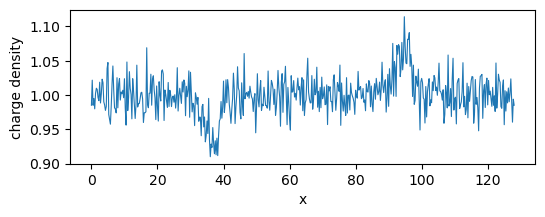

In [7]:
fig, ax = plt.subplots(figsize=(6,2))

N.plot(qty='value', ax=ax, ls='solid', lw=0.8, color='tab:blue', ylabel='charge density')

In [8]:
n = gFilt(N, sigma=6)

nb_ghosts (2) < sigma (6) : your gaussian filter might be dirty


In [9]:
pks_plus = peakIds(n, height=1.05)
# pks = peakIds(n, prominence=(0.02))
pks_minus = peakIds(-n, names=['value',], height=-0.95)

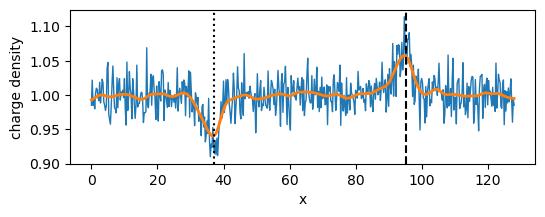

In [10]:
fig, ax = plt.subplots(figsize=(6,2))

N.plot(qty='value', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='charge density')
n.plot(qty='value', ax=ax, ls='solid', lw=2.0, color='tab:orange', ylabel='charge density')
for p in pks_plus:
    ax.axvline(x=p, color='black', linestyle='dashed')
for p in pks_minus:
    ax.axvline(x=p, color='black', linestyle='dotted')

# Operation on `VectorField`

In [11]:
V = run.GetVi(time)
type(V)

pyphare.pharesee.hierarchy.vectorfield.VectorField

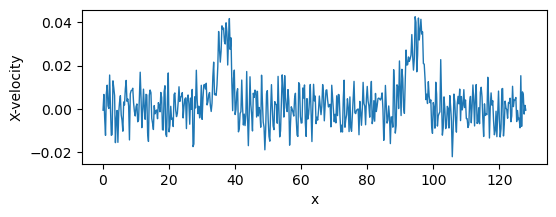

In [12]:
fig, ax = plt.subplots(figsize=(6,2))

V.plot(qty='x', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='X-velocity')

In [13]:
v = gFilt(V, sigma=6)

nb_ghosts (2) < sigma (6) : your gaussian filter might be dirty


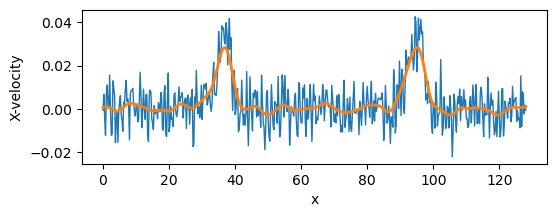

In [14]:
fig, ax = plt.subplots(figsize=(6,2))

V.plot(qty='x', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='X-velocity')
v.plot(qty='x', ax=ax, ls='solid', lw=2.0, color='tab:orange', ylabel='X-velocity')

In [15]:
pks = peakIds(v, height=0.02)

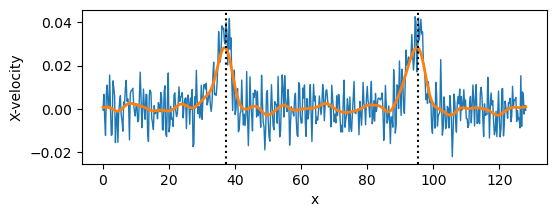

In [16]:
fig, ax = plt.subplots(figsize=(6,2))

V.plot(qty='x', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='X-velocity')
v.plot(qty='x', ax=ax, ls='solid', lw=2.0, color='tab:orange', ylabel='X-velocity')
for p in pks:
    ax.axvline(x=p, color='black', linestyle='dotted')

# Get an interpolator on a `ScalarField`

In [17]:
inter = N.interpol(run, time)

In [18]:
fn, x_ = inter['value']
x = np.asarray(x_[0])
x = np.arange(0, 150)

Text(0, 0.5, 'charge density')

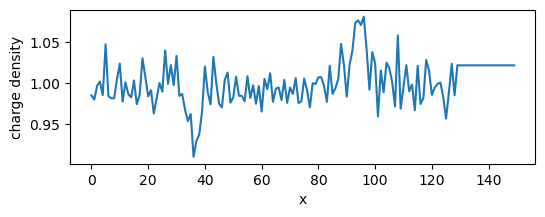

In [19]:
fig, ax = plt.subplots(figsize=(6,2))

ax.plot(x, fn(x))
ax.set_xlabel('x')
ax.set_ylabel('charge density')

# Get an interpolator on a `VectorField`

In [20]:
inter = V.interpol(run, time)

In [21]:
fvx, x_ = inter['x']
x = np.asarray(x_[0])

Text(0, 0.5, 'X-velocity')

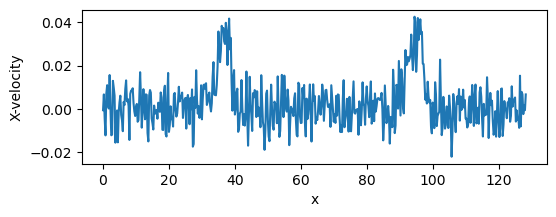

In [22]:
fig, ax = plt.subplots(figsize=(6,2))

ax.plot(x, fvx(x))
ax.set_xlabel('x')
ax.set_ylabel('X-velocity')

In [23]:
for ilvl, lvl in N.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        print(dir(patch.patch_datas[list(patch.patch_datas.keys())[0]]))
        for name in names:
            pdata = patch.patch_datas[name]
            # print("name       : {}".format(name))
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

names      : ['value']
id         : p0#0
box        : Box([0],[511])
['__class__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_x', '_y', '_z', 'box', 'centerings', 'compare', 'dataset', 'dl', 'field_name', 'ghost_box', 'ghosts_nbr', 'layout', 'meshgrid', 'name', 'ndim', 'offset', 'origin', 'primal_directions', 'quantity', 'select', 'size', 'x', 'y', 'z']
size [value]  : [517]   -   ['primal']
 --- 
